In [4]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score

In [5]:
  df = pd.read_csv("/content/collegePlace (1).csv")
  df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [6]:
df.shape

(2966, 8)

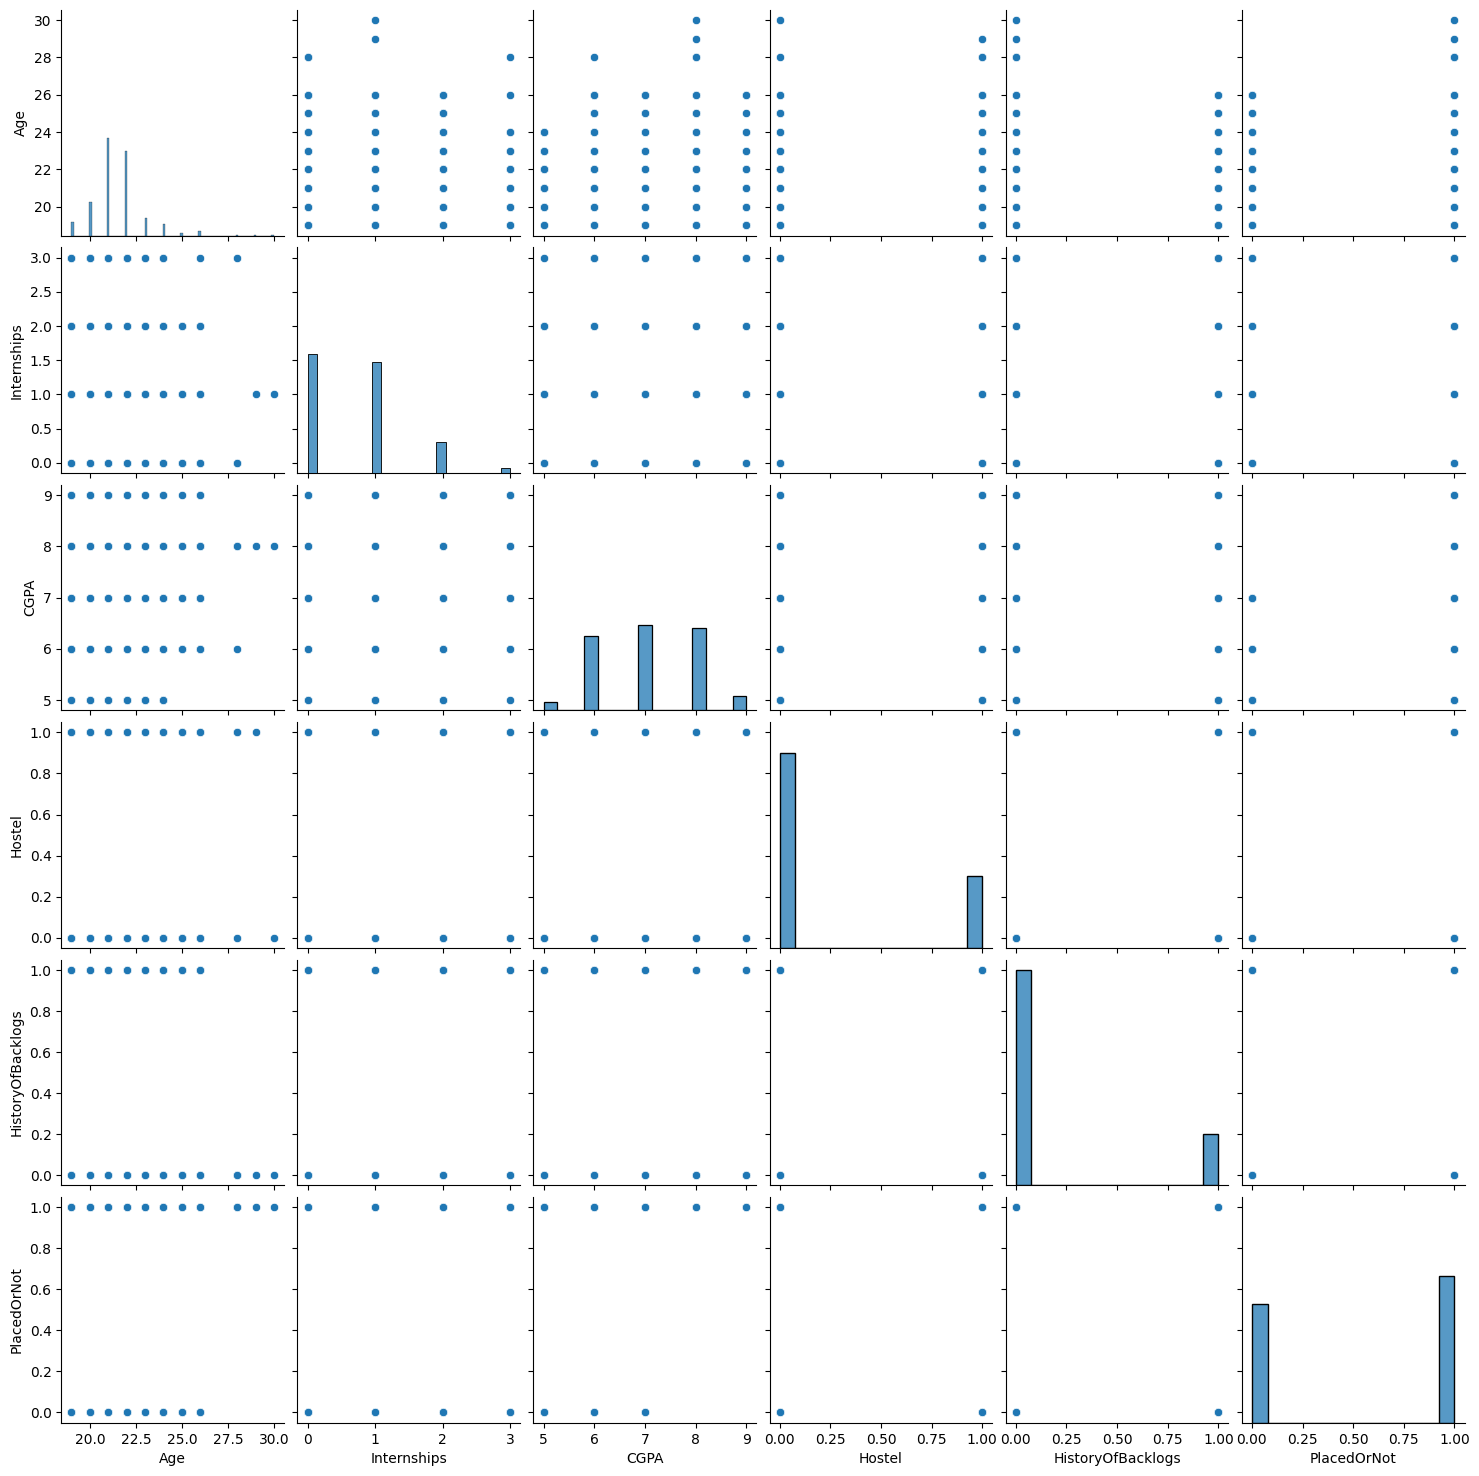

In [7]:
sns.pairplot(df)

In [8]:
corr = df.corr()

<ipython-input-8-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


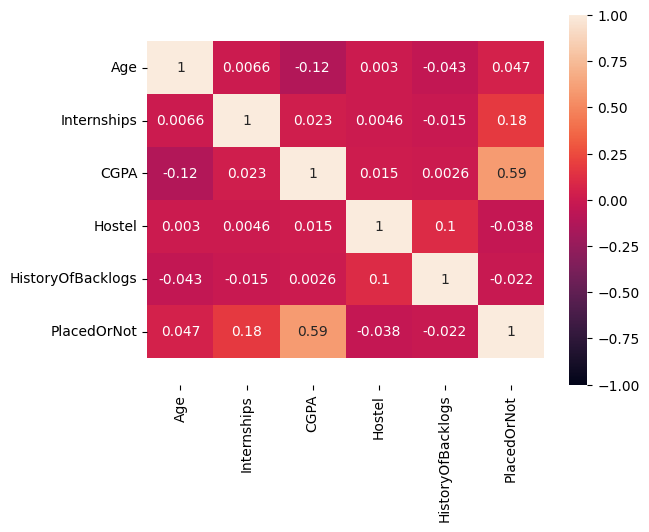

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
Age,1.000000,0.006552,-0.119787,0.003042,-0.042586,0.046943
Internships,0.006552,1.000000,0.023496,0.004617,-0.015118,0.179334
CGPA,-0.119787,0.023496,1.000000,0.014991,0.002576,0.588648
Hostel,0.003042,0.004617,0.014991,1.000000,0.103506,-0.038182
HistoryOfBacklogs,-0.042586,-0.015118,0.002576,0.103506,1.000000,-0.022337
PlacedOrNot,0.046943,0.179334,0.588648,-0.038182,-0.022337,1.000000


In [9]:
ax = sns.heatmap(corr, vmin = -1, vmax = 1, annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()
corr

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [11]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [12]:
def transformationplot(feature):
  plt.figure(figsize=(12,5))
  plt.subplot(1,2,1)
  sns.distplot(feature)
  transformationplot(np.log(df['Age']))

In [13]:
df = df.replace(['Male'],[0])
df = df.replace(['Female'],[1])
df = df.replace(['Computer science','Information technology','Electronics and Communication','Mechanical','Electrical','Civil'],[0,1,2,3,4,5])
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,0,Electronics And Communication,1,8,1,1,1
1,21,1,Computer Science,0,7,1,1,1
2,22,1,Information Technology,1,6,0,0,1
3,21,0,Information Technology,0,8,0,1,1
4,22,0,3,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,0,Information Technology,0,7,0,0,0
2962,23,0,3,1,7,1,0,0
2963,22,0,Information Technology,1,7,0,0,0
2964,22,0,Computer Science,1,7,0,0,0


<ipython-input-14-f92659182652>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'],color='r')


<Axes: xlabel='CGPA', ylabel='Density'>

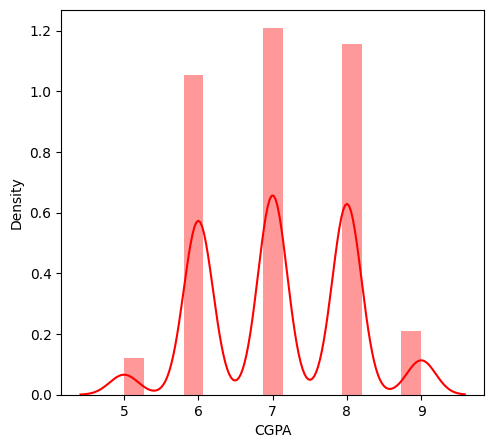

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['CGPA'],color='r')

<ipython-input-15-ce4ecd69df70>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PlacedOrNot'],color='g')


<Axes: xlabel='PlacedOrNot', ylabel='Density'>

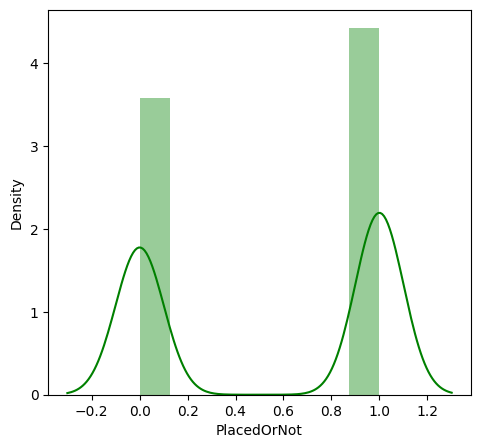

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['PlacedOrNot'],color='g')

In [16]:
df.describe()

,Age,Gender,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.165543,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.371732,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,0.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,0.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,1.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [17]:
df['Gender'].value_counts()

0    2475
1     491
Name: Gender, dtype: int64

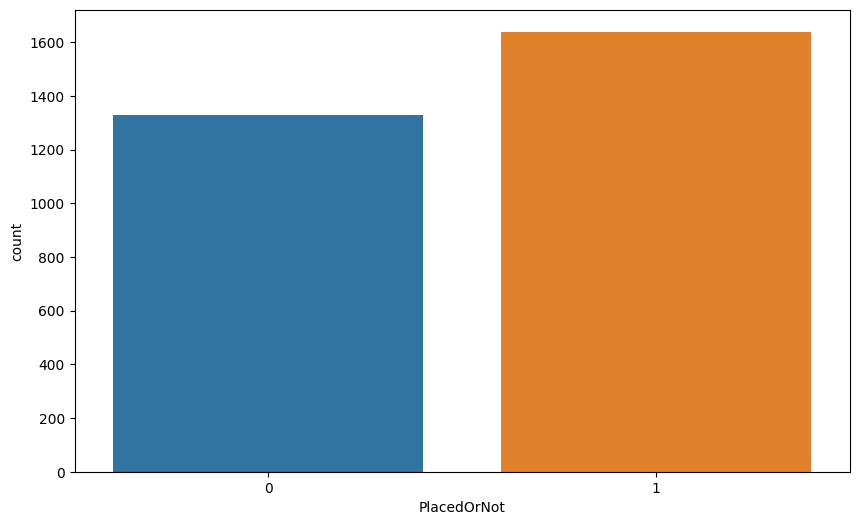

In [18]:
plt.figure(figsize = (10,6), dpi = 100)
color_palette = sns.color_palette("BuGn_r")
sns.countplot(x = "PlacedOrNot", data = df)
plt.show()

In [19]:
df['Stream'].value_counts()

Computer Science                 776
Information Technology           691
Electronics And Communication    424
3                                424
4                                334
5                                317
Name: Stream, dtype: int64

In [20]:
X = df.drop(columns = 'PlacedOrNot', axis=1)
Y = df['PlacedOrNot']

In [21]:
import joblib
joblib.dump(X,'placement')

['placement']

In [22]:
print(X)

      Age  Gender                         Stream  Internships  CGPA  Hostel  \
0      22       0  Electronics And Communication            1     8       1   
1      21       1               Computer Science            0     7       1   
2      22       1         Information Technology            1     6       0   
3      21       0         Information Technology            0     8       0   
4      22       0                              3            0     8       1   
...   ...     ...                            ...          ...   ...     ...   
2961   23       0         Information Technology            0     7       0   
2962   23       0                              3            1     7       1   
2963   22       0         Information Technology            1     7       0   
2964   22       0               Computer Science            1     7       0   
2965   23       0                              5            0     8       0   

      HistoryOfBacklogs  
0                     1  

In [23]:
scaler = StandardScaler()

In [24]:
scaler.fit(X)

ValueError: ignored

<Axes: xlabel='PlacedOrNot', ylabel='PlacedOrNot'>

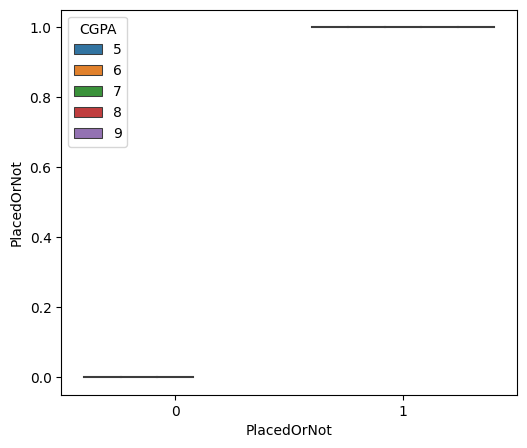

In [25]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.violinplot(data=df, x='PlacedOrNot', y='PlacedOrNot', hue='CGPA')

<Axes: xlabel='PlacedOrNot', ylabel='PlacedOrNot'>

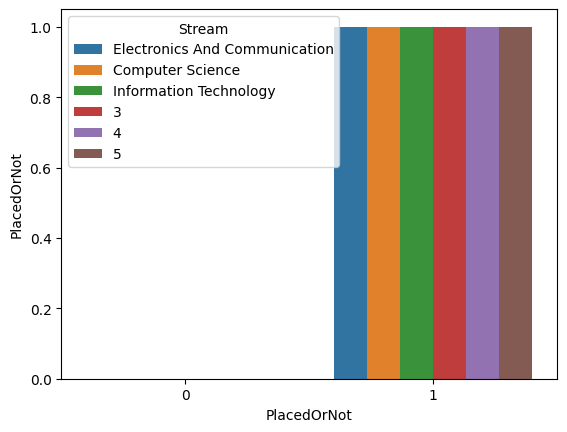

In [26]:
#@title Default title text
sns.barplot(x=df.PlacedOrNot, y=df.PlacedOrNot, hue=df.Stream)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(2966, 7) (2372, 7) (594, 7)


In [30]:
classifier = svm.SVC(kernel='linear')


In [31]:
classifier.fit(X_train, Y_train)

ValueError: ignored

In [ ]:
sc=StandardScaler()
train_test_split=sc.fit_transform('train_test_split')
train_test_split = pd.DataFrame(train_test_split,columns=names)


ValueError: ignored

In [ ]:
X = standardized_data
Y = df['PlacedOrNot']
X_train, X_test, Y_train, y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)



NameError: ignored

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train, Y_train)
SVC(kernel='linear')
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data :', training_data_accuracy)

NameError: ignored

In [ ]:
#@title Default title text
best_k = {"Regular":0}
best_score = {"Regular":0}
for k in range(3, 50, 2):
  knn_temp = KNeighborsClassifier(n_neighbors=k)
knn_temp.fit(X_train, Y_train)
knn_temp_pred = knn_temp.predict(X_test)
score = metrics.accuracy_score(Y_test, knn_temp_pred) * 100
if score >= best_score["Regular"] and score < 100:
  best_score["Regular"] = score
  best_k["Regular"] = k
  print("---Results---\nK: {}".format(best_k, best_score))
  knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])
  knn.fit(X_train, Y_train)
  knn_pred = knn.predict(X_test)
  testd = accuracy_score(knn_pred, Y_test)

NameError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
classifier = Sequential()
classifier.add(keras.layers.Dense(6,activation = 'relu', input_dim = 6))
classifier.add(keras.layers.Dropout(0.50))
classifier.add(keras.layers.Dense(6,activation = 'relu'))
classifier.add(keras.layers.Dropout(0.50))
classifier.add(keras.layers.Dense(1,activation = 'sigmoid'))


In [ ]:
loss_1 = tf. keras.losses.BinaryCrossentropy()
classifier.compile(optimizer = 'Adam', loss = loss_1 , metrics = ['accuracy'])

In [ ]:
classifier.fit(X_train, Y_train, batch_size = 20, epochs = 100)

NameError: ignored

In [ ]:
import pickle
pickle.dump(knn,open("placement.pkl",'wb'))
model = pickle.load(open('placement.pkl', 'rb'))

NameError: ignored

In [ ]:
<section id="hero" class="d-flex flext-column justify-content-center">
<div class="container">
<div class="row justify-content-center">
<div class="col-xl-8">
<h1>Identifying Patterns And Trends In Campus Placement Data using Machine Learning</h1>
</div>
</div>
</div>
</section>


SyntaxError: ignored

In [ ]:
<section id="about" class="about">
<div class=container>
<div class="section-title">
<h2>Fill the details</h2>
</div>
<div class="row content">
<div class="first">
<form action="{{ url_for('y_predict')}}"method="POST">
<input type="number" id="sen1" name="sen1" placeholder="Age">
<input type="number" id="sen2" name="sen2" placeholder="Gender M(0),F(0)">
<input type="number" id="sen3" name="sen3" placeholder="stream CS(0),IT(1),ECE(2),Mech(3),EEE(4)Civil(5)">
<input type="number" id="sen4" name="sen4" placeholder="Internships">
<input type="number" id="sen5" name="sen5" placeholder="CGPA">
<input type="number" id="sen6" name="sen6" placeholder="Number of backlogs">
<input type="submit" value="Submit">
</form>
</div>
</div>
</div>
</section>

In [ ]:
<section id="hero" class="d-flex flex-column justify-content-center">
<div class="container">
<div class="row justify-content-center">
<div class="col-xl-8">
<h1>The Prediction is: {{y}}</h1>
<h2> 0 represents Not-Placed</h2>
<h3> 1 represents Placed</h3>
</div>
</div>
</div>
</section>

SyntaxError: ignored

In [ ]:
from flask import Flask, render_template, request
app=Flask(__name__)
import pickle
import joblib
model=pickle.load(open("placement123.pkl",'rb'))
ct=joblib.load('placement')

FileNotFoundError: ignored

In [ ]:
@app.route('/')
def hello():
  return render_template("index.html")

In [ ]:
@app.route('/guest', methods = ["POST"])
def Guest():
  sen1=request.form["sen1"]
  sen2=request.form["sen2"]
  sen3=request.form["sen3"]
  sen4=request.form["sen4"]
  sen5=request.form["sen5"]
  sen6=request.form["sen6"]

  @app.route('/y_predict' , methods = ["POST"])
  def y_predict():
    x_test = [[(yo) for yo in request.form.values()]]
    prediction =model.predict(x_test)
    prediction = prediction[0]
    return render_template("secondpage.html",y=prediction)



AssertionError: ignored

In [ ]:
app.run(deb)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
